In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
print(pd.__version__)
print(np.__version__)

2.2.3
2.0.2


# **Cleaning and preprocessing**

In [5]:
df = pd.read_csv("C:/Users/quent_a/Downloads/anime_with_synopsis.csv")

In [6]:
df.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [7]:
print(df.info())
print(df.shape)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB
None
(16214, 5)
MAL_ID       0
Name         0
Score        0
Genres       0
sypnopsis    8
dtype: int64


In [8]:
#Correcting df mistakes, filling in N/A values, noramlizing columns
df = df.rename(columns={'sypnopsis': 'Synopsis'})
df.fillna({'Synopsis': "No synopsis available"}, inplace=True)
df['Genres'] = df['Genres'].apply(lambda x: x.split(', '))
df['Genres'] = df['Genres'].apply(lambda x: [g.lower() for g in x])

In [9]:
print(df['Score'].unique())

['8.78' '8.39' '8.24' '7.27' '6.98' '7.95' '8.06' '7.59' '8.15' '8.76'
 '7.91' '8.52' '7.9' '6.38' '7.94' '7.42' '7.76' '7.32' '7.51' '8.32'
 '7.45' '8.51' '8.49' '8.29' '8.73' '8.31' '7.56' '8.17' '7.35' '6.31'
 '7.26' '7.14' '7.1' '6.53' '5.91' '7.05' '7.43' '7.66' '7.2' '6.77'
 '6.62' '7.44' '7.65' '7.98' '7.58' '7.38' '6.35' '8.07' '7.96' '7.3'
 '7.99' '7.09' '7.78' '8.03' '6.79' '7.92' '6.66' '7.68' '6.67' '6.76'
 '7.72' '7.79' '7.22' '7.7' '7.82' '7.46' '7.31' '7.48' '7.39' '7.23'
 '6.46' '7.29' '6.81' '7.63' '6.83' '4.95' '7.93' '6.97' '6.85' '6.56'
 '7.69' '7.64' '6.86' '6.49' '6.91' '6.96' '7.41' '7.61' '6.21' '8.11'
 '8.42' '8.33' '8.21' '6.14' '6.87' '7.11' '7.24' '7.12' '7.28' '6.59'
 '7.34' '6.34' '7.33' '6.94' '6.48' '8.72' '8.53' '6.93' '6.63' '6.19'
 '7.55' '7.18' '6.69' '7.21' '6.37' '8.12' '7.89' '7.25' '6.8' '7.17'
 '6.88' '6.55' '8.83' '6.11' '8.5' '7.16' '7.4' '7.67' '5.94' '7.52'
 '6.68' '8.0' '6.92' '7.02' '6.18' '8.16' '6.64' '8.09' '7.36' '6.45'
 '8.7' '7.85' '

In [10]:
df = df[df['Score'] != 'Unknown']

In [11]:
df['Score'].apply(lambda x: float(x))

0        8.78
1        8.39
2        8.24
3        7.27
4        6.98
         ... 
16157    6.59
16158    7.52
16165    6.83
16166    4.81
16204    6.52
Name: Score, Length: 11091, dtype: float64

In [12]:
print(df['Name'].nunique())

11090


In [13]:
#Checking for duplicates
duplicates = df[df['Name'].duplicated(keep=False)]
duplicates

,MAL_ID,Name,Score,Genres,Synopsis
11664,35102,Hinamatsuri,6.79,"[historical, kids]",ducational anime about the history and foundin...
12347,36296,Hinamatsuri,8.21,"[comedy, sci-fi, seinen, slice of life, supern...",hile reveling in the successful clinching of a...


In [163]:
#Saves cleaned dataset
df.to_csv('cleaned_anime_dataset.csv', index=False)

In [95]:
anime_df = pd.read_csv('cleaned_anime_dataset.csv')
anime_df.head()

,MAL_ID,Name,Score,Genres,Synopsis
0,1,Cowboy Bebop,8.78,"['action', 'adventure', 'comedy', 'drama', 'sc...","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"['action', 'drama', 'mystery', 'sci-fi', 'space']","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"['action', 'sci-fi', 'adventure', 'comedy', 'd...","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"['action', 'mystery', 'police', 'supernatural'...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"['adventure', 'fantasy', 'shounen', 'supernatu...",It is the dark century and the people are suff...


In [15]:
#adding a new "Content" column will make the "Genres" column into a string
#This function converts a string of a list back to a list
def back_to_list(string):
    stripped_str = string.strip('[]')
    new_list = stripped_str.split(', ')
    return new_list

In [96]:
#Putting genres and synopsis into a separate column to run tf-idf on
anime_df['Content'] = anime_df['Genres'] + ' ' + anime_df['Synopsis']
anime_df['Genres'] = anime_df['Genres'].apply(back_to_list)
print(type(anime_df.iloc[0,3]))
anime_df.head()

<class 'list'>


,MAL_ID,Name,Score,Genres,Synopsis,Content
0,1,Cowboy Bebop,8.78,"['action', 'adventure', 'comedy', 'drama', 'sc...","In the year 2071, humanity has colonized sever...","['action', 'adventure', 'comedy', 'drama', 'sc..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"['action', 'drama', 'mystery', 'sci-fi', 'space']","other day, another bounty—such is the life of ...","['action', 'drama', 'mystery', 'sci-fi', 'spac..."
2,6,Trigun,8.24,"['action', 'sci-fi', 'adventure', 'comedy', 'd...","Vash the Stampede is the man with a $$60,000,0...","['action', 'sci-fi', 'adventure', 'comedy', 'd..."
3,7,Witch Hunter Robin,7.27,"['action', 'mystery', 'police', 'supernatural'...",ches are individuals with special powers like ...,"['action', 'mystery', 'police', 'supernatural'..."
4,8,Bouken Ou Beet,6.98,"['adventure', 'fantasy', 'shounen', 'supernatu...",It is the dark century and the people are suff...,"['adventure', 'fantasy', 'shounen', 'supernatu..."


# **Some Visualizations**

[4509 3272 2369 2273 2154 2022 1796 1678 1369 1368 1231 1217  940  893
  733  730  725  713  637  612  533  516  507  439  408  359  357  347
  327  313  304  300  208  164  127  114   91   91   77   66   28   15]
Index([''comedy'', ''action'', ''fantasy'', ''adventure'', ''sci-fi'',
       ''drama'', ''shounen'', ''romance'', ''slice of life'', ''school'',
       ''supernatural'', ''music'', ''mecha'', ''magic'', ''ecchi'', ''kids'',
       ''seinen'', ''historical'', ''mystery'', ''shoujo'', ''sports'',
       ''super power'', ''military'', ''parody'', ''space'', ''horror'',
       ''demons'', ''harem'', ''martial arts'', ''psychological'',
       ''dementia'', ''game'', ''police'', ''samurai'', ''vampire'',
       ''thriller'', ''shounen ai'', ''josei'', ''shoujo ai'', ''cars'',
       ''yaoi'', ''unknown''],
      dtype='object', name='Genres')


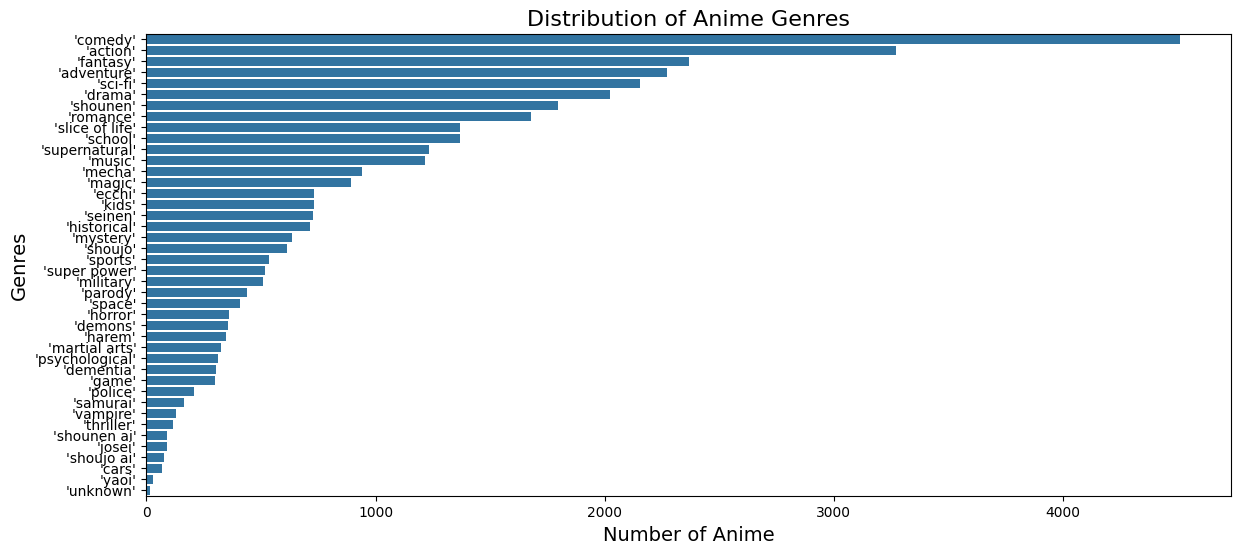

In [17]:
genres = anime_df['Genres'].explode('Genres')
genre_counts = genres.value_counts()

plt.figure(figsize=(14,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
print(genre_counts.values)
print(genre_counts.index)
plt.title('Distribution of Anime Genres', fontsize=16)
plt.xlabel('Number of Anime', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.show()

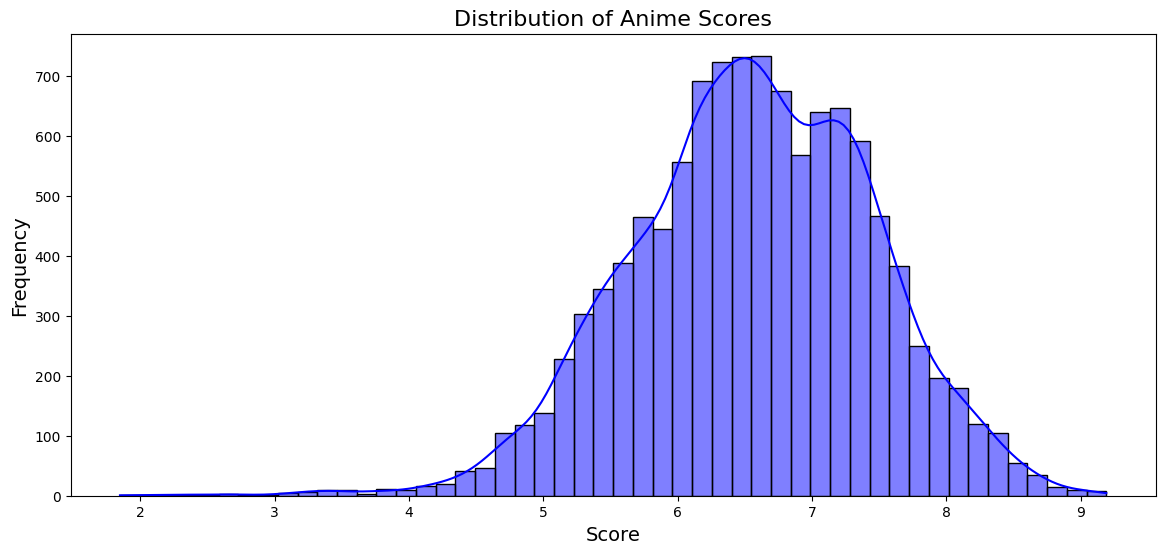

In [18]:
scores = anime_df['Score'].dropna()
plt.figure(figsize=(14,6))
sns.histplot(scores, bins=50, kde=True, color="blue")
plt.title('Distribution of Anime Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# **Building the Recommender system**

**-----**

In [20]:
#Calculate the cosine similarity of all of the anime in the matrix with the other anime's
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [21]:
def get_recommendations(title, cosine_sim, data, top_n=10, min_score=0):
    #Find the index of the anime with the given title
    idx = data[data['Name'] == title].index[0]

    #create a list of the similarity of inputted anime w/ the rest in dataset
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Sort the list, with the most similar being at the top
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Returns the indicies for the most similar anime, returns set amount user requests, excludes the anime itself
    top_indicies = [i[0] for i in sim_scores[1:top_n+1]]

    return data['Name'].iloc[top_indicies]

In [97]:
recommendations = get_recommendations("Naruto", cosine_sim, anime_df, top_n=10) #Terror in resonance
print('Recommended Anime:')
recommendations

Recommended Anime:


1506                                   Naruto: Shippuuden
8860                      Boruto: Naruto Next Generations
5623           Naruto: Shippuuden Movie 6 - Road to Ninja
3048    Naruto: Shippuuden - Shippuu! "Konoha Gakuen" Den
7245                             Boruto: Naruto the Movie
1946    Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...
4381          Naruto: Shippuuden Movie 4 - The Lost Tower
5521     Naruto SD: Rock Lee no Seishun Full-Power Ninden
546     Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...
5083            Naruto: Shippuuden Movie 5 - Blood Prison
Name: Name, dtype: object

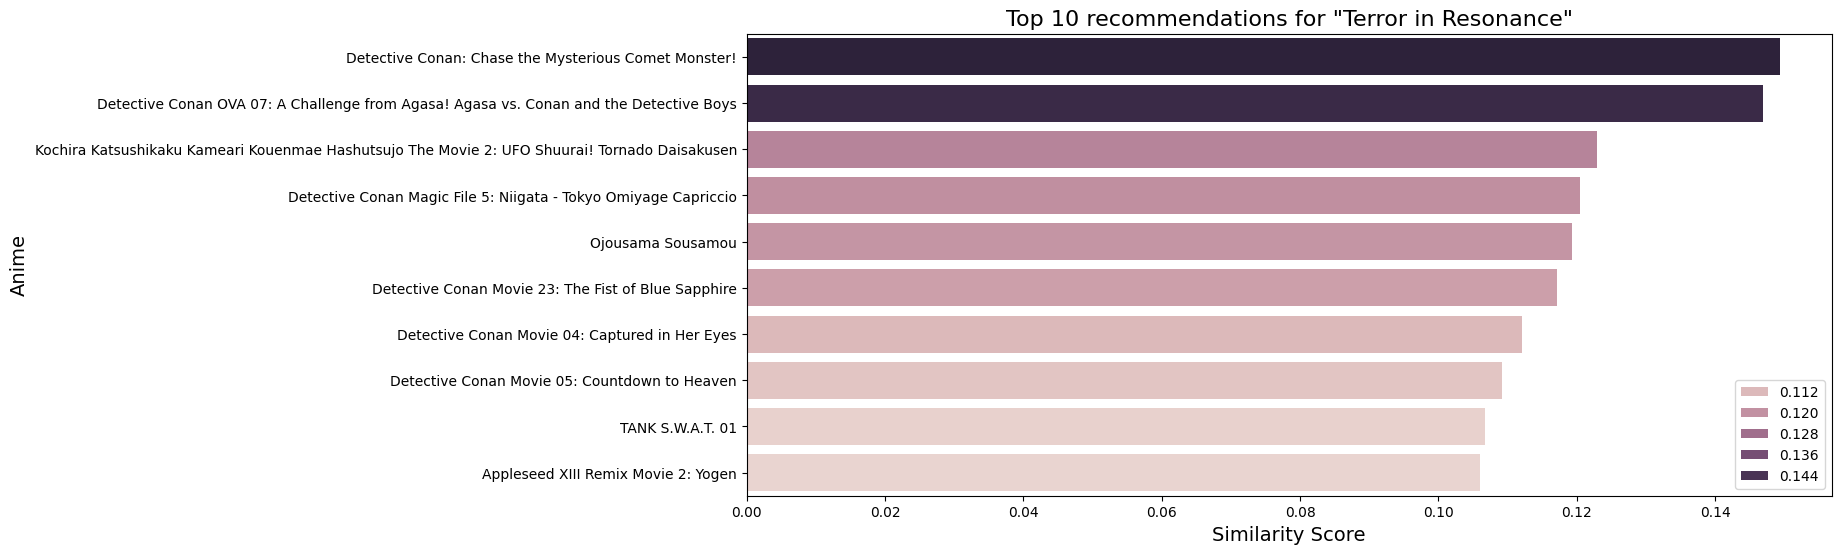

In [99]:
recommendations = get_recommendations('Zankyou no Terror', cosine_sim, anime_df)
similarities = [cosine_similarity(tfidf_matrix[anime_df['Name'] == 'Zankyou no Terror'], tfidf_matrix[anime_df['Name'] == rec]) for rec in recommendations]

plt.figure(figsize=(14,6))
sns.barplot(y=recommendations.values, x=list(map(lambda x: float(x), similarities)), hue = list(map(lambda x: float(x), similarities)))
plt.title('Top 10 recommendations for "Terror in Resonance"', fontsize=16)
plt.xlabel('Similarity Score', fontsize=14)
plt.ylabel('Anime', fontsize=14)
plt.show()

# **Recommendation 2.0**

In [100]:
#Initialize new genre tf-idf vectorizer
genre_vectorizer = TfidfVectorizer(
    tokenizer=lambda x: x.split(','),
    lowercase=False,
    binary=True
)
anime_df['Genres'] = anime_df['Genres'].apply(lambda x: ','.join(x)) #convert Genres column back to string
genre_tfidf = genre_vectorizer.fit_transform(anime_df['Genres'])

#Initialize new synopsis tf-idf vectorizer
synopsis_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.6,
    min_df=5,
    ngram_range=(1,2),
    sublinear_tf=True
)

synopsis_tfidf = synopsis_vectorizer.fit_transform(anime_df['Synopsis'])

print('Genre shape:', genre_tfidf.shape)
print('Synopsis shape', synopsis_tfidf.shape)

C:\Users\quent_a\OneDrive\Documents\Python\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Genre shape: (11091, 42)
Synopsis shape (11091, 14576)


In [77]:
genre_sim = cosine_similarity(genre_tfidf)
synopsis_sim = cosine_similarity(synopsis_tfidf)

alpha = 0.75   # genre weight
beta  = 0.25   # synopsis weight

similarity = alpha * genre_sim + beta * synopsis_sim

In [102]:
#Redo the recommendation function using maximal marginal relevance
def mmr_rerank(title, sim_matrix = similarity, top_n=10, lambda_=0.49):
    #index the anime inputted, initialize output list, and initialize list of similar candidates
    query_idx = anime_df[anime_df['Name'] == title].index[0]
    selected = []
    candidates = list(range(sim_matrix.shape[0]))
    candidates.remove(query_idx)

    #Iterate top_n times to return list
    for _ in range(top_n):
        scores = []
        #Calculate relevance to initial query, then redundancy relevant to already selected animes, punish redundancy and
        #return score
        for c in candidates:
            relevance = sim_matrix[query_idx, c]
            redundancy = max(
                [sim_matrix[c, s] for s in selected],
                default=0
            )
            score = lambda_ * relevance - (1 - lambda_) * redundancy
            scores.append((c, score))

        #Creates list of selected indicies and removes selected candidate from list of potential candidates
        best = max(scores, key=lambda x: x[1])[0]
        selected.append(best)
        candidates.remove(best)

    #convert back from indicies to names in order to return
    recommendations = anime_df.loc[selected, 'Name'].tolist()

    return recommendations

In [101]:
mmr_rerank('Naruto', similarity, top_k=10)

['Naruto: Shippuuden',
 'Cheonnyeon-yeowoo Yeowoobi',
 'Bloody Date',
 'Mayoiga',
 'Marimo no Hana: Saikyou Butouha Shougakusei Densetsu',
 'Urarochi Diamond',
 'Doubutsu no Mori',
 'Namake Gitsune',
 'Hokuto no Ken: Toki-den',
 'Tokyo Juushouden']

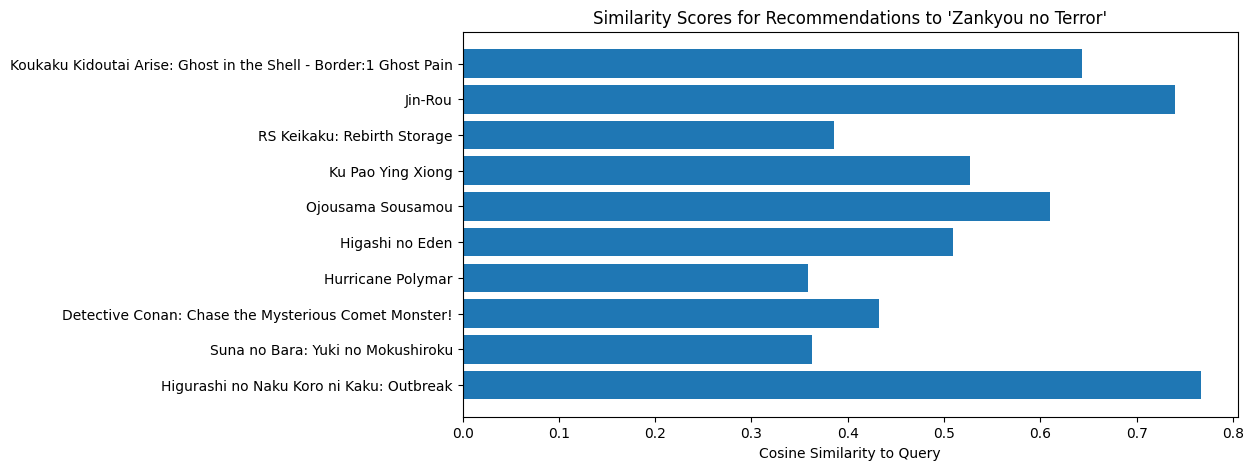

In [88]:
names = mmr_rerank('Zankyou no Terror', similarity, top_k=10)

indices = []
for name in names:
    idx = anime_df[anime_df['Name'] == name].index[0]
    indices.append(idx)

scores = [similarity[6746, i] for i in indices]

plt.figure(figsize=(10, 5))
plt.barh(names, scores)
plt.xlabel("Cosine Similarity to Query")
plt.title(f"Similarity Scores for Recommendations to '{anime_df.loc[6746, 'Name']}'")
plt.show()